In [1]:
from gensim.models import LdaModel
import pandas as pd
from gensim.corpora import Dictionary
from gensim import corpora, models
import csv
rawdata = pd.read_csv('./dataset/toutiao/DMSC.csv',low_memory=False)
rawdata = rawdata[rawdata['Movie_Name_CN']=='大圣归来']
rawdata=rawdata[['Star','Comment']]
rawdata['Star'][rawdata['Star']<=2 ]=0
rawdata['Star'][rawdata['Star']>=3 ]=1
print('均匀样本前\n',rawdata.Star.value_counts())
class_num=len(rawdata[rawdata['Star']==0])
data=pd.concat([rawdata[rawdata['Star']==1].sample(class_num),rawdata[rawdata['Star']==0]]).sample(2*class_num)
data.index=range(2*class_num)
print('均匀样本后\n',data.Star.value_counts())

均匀样本前
 1    127547
0      5846
Name: Star, dtype: int64
均匀样本后
 0    5846
1    5846
Name: Star, dtype: int64


/tmp/ipykernel_3410136/1218118473.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata['Star'][rawdata['Star']>=3 ]=1


In [2]:
good=data[data['Star']==1]
bad=data[data['Star']==0]

[['每个人心中都有一只猴子'], ['这电影最开始一段确实牛X闪闪呢，那分镜头那运动机位。不过到了中间打斗，一直感觉飘着“资金不足”这几个字。而且故事剧情上还需要加强，能明显感觉到借鉴了狮子王之类。总体来说，能在国内动漫市场做到这样，实属不易，下部融资杀回来吧'], ['可能是我不够专业的原因，去影院看完后满满的失望，那么多的好评让我对它有太多期望，可3D效果无法与迪士尼媲美，龙的胡须制作依旧过于粗糙，故事可以更丰满。上面的小男孩好可爱，对于国产动画或许是个榜样'], ['观看过程中，一直处于合不拢嘴状态，感觉国产动漫做到这个地步确实很不容易和很厉害！！！有瑕疵但是瑕不掩瑜！'], ['不错，国漫良心'], ['全五星是因为我真的看到了国产动漫的希望。'], ['4星', '第一次一起看电影', '加1星'], ['剧情有明显的瑕疵，收尾特别草率，人物刻画也不够细腻。但是归根结底是国产动画的一个进步，特效和音乐都十分值得称赞。'], ['看完小门神后', '值得四星'], ['硬要说是剧情弱也没问题，但我觉得最大的问题还是节奏太赶了，一个长成类自我救赎的故事要在90分钟里讲完，笔墨轻重的考量就极重要。抓不住内心选择转变的关键，着墨不够多，铺垫不够细，大开大合的人物变化才是硬伤吧。'], ['如过去看，至少要去看一次3D，真的不容错过'], ['打这分就是给制作的', '剧情无法评说。。几次看到要睡着'], ['诚意之作吧，水准提升很大，'], ['完全被豆瓣评分骗了...不说水军啥的，只相信自己的眼睛...剧情就是渣...讲的什么玩意，不死小强江流儿被乱石砸不死，竟然让猴王圣衣铠甲装身是什么设定？没有沙和尚，唐僧，那讲的啥西游记？想说的是要永远对偶像有信心，就能让偶像重返巅峰？绿怪如此恐怖，女妖那么低胸，确定是给小朋友看的？'], ['8.8实在是虚高了，除了3D画面效果还好外，故事情节不连贯，音乐效果太突兀…'], ['剧情有些粗糙，但是画风细腻，人物刻画的不错，还有最后一段大圣变身，最后从大圣，五分'], ['国产良心之作，5星鼓励。画风帅气，摆脱乡土气息，变身冷酷拽了。情节内涵完胜超能陆战队等一干好莱坞动画。不过，跟大圣娶亲相比，还差一大截。最后一幕不要配音，只给一个迎着晚霞的背影回眸，感觉会更好。'], ['好几天没来了忙死', '大圣归来非常好看期待第二

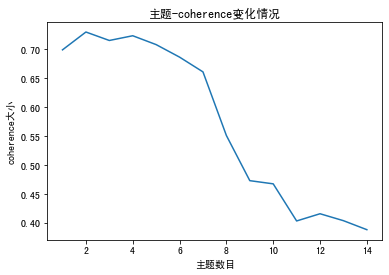

In [3]:
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
 
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
 
file_object2=good.Comment.values
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
print(data_set)
 
 
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
#Lda = gensim.models.ldamodel.LdaModel  # 创建LDA对象
 
#计算困惑度
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)
 
#计算coherence
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=data_set, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()
 
# 绘制困惑度折线图
x = range(1,15)
# z = [perplexity(i) for i in x]
y = [coherence(i) for i in x]
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-coherence变化情况')
plt.show()

In [4]:
# 准备数据
 
file_object2= good.Comment.values
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
 
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
print(result_list)

[(0, '0.001*"还不错" + 0.001*"很好看" + 0.001*"真心不错" + 0.001*"喜欢" + 0.001*"鼓励" + 0.001*"业界良心" + 0.001*"期待续集" + 0.001*"to" + 0.001*"so" + 0.001*"a"'), (1, '0.006*"良心之作" + 0.004*"不错" + 0.002*"良心国漫" + 0.001*"情怀" + 0.001*"好" + 0.001*"特效不错" + 0.001*"值得一看" + 0.001*"good" + 0.001*"u" + 0.001*"支持"'), (2, '0.006*"好看" + 0.002*"感动" + 0.002*"赞" + 0.002*"国产动画" + 0.001*"意犹未尽" + 0.001*"很棒！" + 0.001*"三星半" + 0.001*"国产动画良心之作" + 0.001*"嗯" + 0.001*"良心"'), (3, '0.005*"大圣" + 0.004*"国漫良心" + 0.003*"2015" + 0.003*"中国大陆" + 0.003*"动画" + 0.002*"还可以" + 0.002*"还行吧" + 0.002*"支持国漫" + 0.002*"棒！" + 0.002*"支持国产动漫"'), (4, '0.005*"国产良心" + 0.004*"加油" + 0.002*"很好" + 0.002*"太棒了" + 0.002*"好看！" + 0.002*"很棒" + 0.001*"帅" + 0.001*"剧情一般" + 0.001*"国产良心之作" + 0.001*"剧情"')]
[0, 4, 4, 4, 0, 3, 2, 3, 3, 4, 0, 4, 2, 3, 4, 1, 1, 1, 2, 2, 3, 3, 0, 0, 3, 1, 4, 2, 3, 3, 2, 4, 0, 4, 2, 2, 1, 2, 2, 0, 2, 3, 3, 3, 1, 4, 1, 1, 4, 1, 1, 0, 4, 3, 3, 1, 1, 2, 3, 2, 4, 1, 4, 0, 0, 1, 3, 4, 4, 0, 0, 4, 4, 4, 2, 4, 2, 3, 0, 1, 0, 3, 0, 3, 2, 3, 1, 1, 0, 4, 

In [7]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(data, 'topic0.html')